# Import Packages

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from DAE import *


%reload_ext autoreload
%autoreload 2

## Load the dataset and preprocess it

In [2]:
# Load the dataset
(train_dataset, test_dataset), dataset_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True, as_supervised=True)

# Create noisy images and combine the datasets: Noisy image batch + Original image batch
train_dataset_combined = pre_process(train_dataset, mean=0.5, std=0.1 )
test_dataset_combined = pre_process(test_dataset, mean=0.5, std=0.1)

Metal device set to: Apple M2


## Train the model

In [3]:
autoencoder = DenoiseAutoEncoder()

# Configure early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Use combined dataset in the `fit` method
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
history = autoencoder.fit(train_dataset_combined,
                          epochs=100,
                          shuffle=True,
                          validation_data=test_dataset_combined,
                          callbacks=[es])

Epoch 1/100
5000/5000 [==============================] - 27s 5ms/step - loss: 0.0176 - val_loss: 0.0132
Epoch 2/100
5000/5000 [==============================] - 54s 11ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 3/100
5000/5000 [==============================] - 1025s 205ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 4/100
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 5/100
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 6/100
5000/5000 [==============================] - 1022s 204ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 7/100
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 8/100
5000/5000 [==============================] - 948s 190ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 9/100
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 10/100
5000/5000 [============================

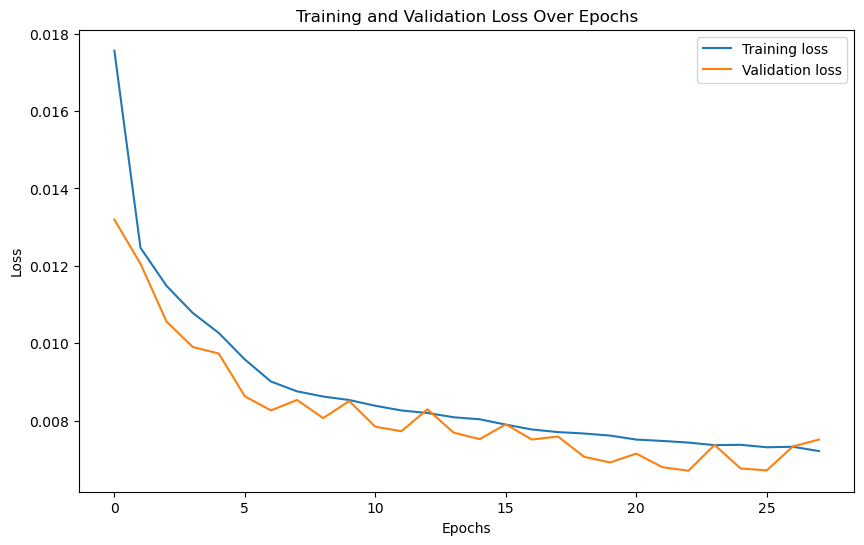

In [4]:
plot_loss_curve(history)

## Visualize

1/1 [==============================] - 0s 78ms/step


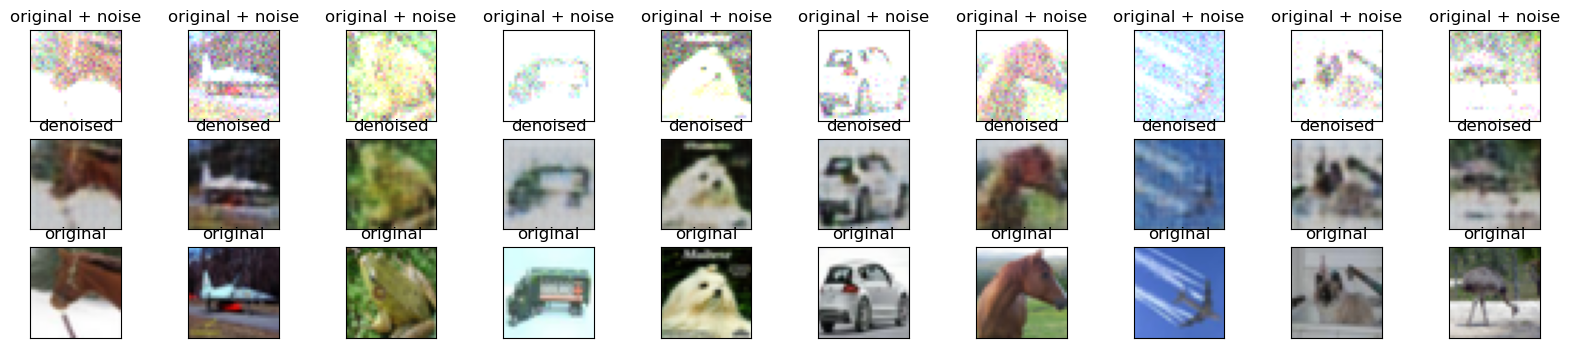

In [5]:
# Visualize the results on test dataset with the trained model
visualize_denoising(autoencoder, test_dataset_combined)

1/1 [==============================] - 0s 39ms/step


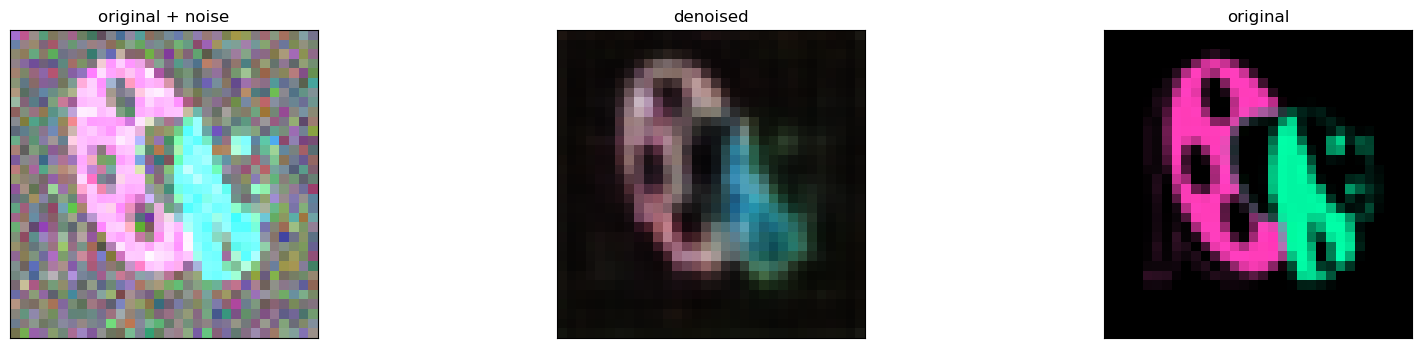

MSE:  0.020599924771531376


0.020599924771531376

In [6]:
# First add noise to the custom image and denoise it. Possible to directly try noised imaged by making bool_noise False.
original_image, denoised_image = denoise_image("sureel_logo.png", autoencoder, bool_noise=True)
plt.imsave("denoised.png", denoised_image)
metric_mse(original_image, denoised_image)
